In [39]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import seaborn as sns

In [40]:
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [41]:
matplotlib.matplotlib_fname()

'c:\\Users\\User\\Documents\\GitHub\\Anime_View_Number_Regression\\.venv\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [68]:
df = pd.read_csv('./BaHaMut_3.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      447 non-null    int64  
 1   動畫名     447 non-null    object 
 2   總觀看數    447 non-null    int64  
 3   平均觀看數   447 non-null    int64  
 4   年份      447 non-null    int64  
 5   月份      447 non-null    object 
 6   集數      447 non-null    int64  
 7   星級      447 non-null    float64
 8   評分人數    447 non-null    int64  
 9   導演監督    445 non-null    object 
 10  台灣代理    447 non-null    object 
 11  製作廠商    447 non-null    object 
 12  作品分類1   447 non-null    object 
 13  作品分類2   439 non-null    object 
 14  作品分類3   319 non-null    object 
 15  作品分類4   140 non-null    object 
 16  作品分類5   44 non-null     object 
 17  作品分類6   4 non-null      object 
 18  原作載體    447 non-null    object 
 19  新續作     447 non-null    object 
dtypes: float64(1), int64(6), object(13)
memory usage: 70.0+ KB


In [70]:
df.tail(40)

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
407,531,昨日之歌,927000,51500,2020,春番,18,4.7,2207,藤原佳幸,木棉花,動畫工房,戀愛,青春,NaN,NaN,NaN,NaN,漫畫改編,新作
408,532,阿爾蒂,573000,47750,2020,春番,12,4.8,1433,濱名孝行,木棉花,Seven Arcs,勵志,職場,NaN,NaN,NaN,NaN,漫畫改編,新作
409,533,辣妹與恐龍,904000,75333,2020,春番,12,4.9,3499,青木純,木棉花,Space Neko Company、神風動畫,喜劇,溫馨,NaN,NaN,NaN,NaN,漫畫改編,新作
410,534,小書痴的下剋上：為了成為圖書管理員不擇手段！第二季,1430000,119167,2020,春番,12,4.9,3100,本郷みつる,木棉花,亞細亞堂,奇幻,異世界,勵志,NaN,NaN,NaN,小說改編,續作
411,535,辣妹與恐龍 真人版,261000,21750,2020,春番,12,4.5,814,大塚貴彦、須藤孝太郎,木棉花,HALO,喜劇,溫馨,真人演出,NaN,NaN,NaN,漫畫改編,新作
412,536,棒球大聯盟 2nd 第二季,857000,34280,2020,春番,25,4.8,516,渡邊步,曼迪,OLM,青春,運動,競技,闔家觀賞,NaN,NaN,漫畫改編,續作
413,537,遊戲王! SEVENS,14000,280,2020,春番,50,4.3,78,近藤信宏,羚邦,Bridge,勵志,競技,闔家觀賞,NaN,NaN,NaN,漫畫改編,新作
414,538,新櫻花大戰,332000,27667,2020,春番,12,4.2,589,小野學,羚邦,SANZIGEN,動作,科幻,機甲,NaN,NaN,NaN,遊戲改編,新作
415,539,文豪與鍊金術師～審判的齒輪～,334000,25692,2020,春番,13,4.6,470,渡邊穩寬,羚邦,OLM,冒險,奇幻,NaN,NaN,NaN,NaN,遊戲改編,新作
416,540,隱瞞之事,1579000,131583,2020,春番,12,4.9,6418,村野佑太,提恩傳媒,亞細亞堂,溫馨,親情,感人,職場,NaN,NaN,漫畫改編,新作


In [105]:
print(df['作品分類1'].unique())
print(df['作品分類2'].unique())
print(df['作品分類3'].unique())
print(df['作品分類4'].unique())
print(df['作品分類5'].unique())
print(df['作品分類6'].unique())

['奇幻' '冒險' '親情' '動作' '異世界' '校園' '戀愛' '科幻' '喜劇' '運動' '青春' '偶像' '超能力' '機甲'
 '悠閒' '溫馨' '推理' '歷史' '懸疑' '料理' '勵志' '魔法' '競技' '靈異神怪' '職場']
['戀愛' '奇幻' '偶像' '冒險' '科幻' '青春' '溫馨' '機甲' '魔法' '歷史' '競技' '校園' '喜劇' '懸疑'
 '靈異神怪' '勵志' '超能力' '音樂' '推理' nan '泡麵番' '血腥暴力' '運動' '異世界' '親情' 'BL' '闔家觀賞'
 '戰爭' '悠閒' '職場' '料理']
[nan '勵志' '懸疑' '異世界' '喜劇' '推理' '青春' '奇幻' '音樂' '校園' '魔法' '黑暗' '戀愛' '靈異神怪'
 '運動' '偶像' '科幻' '溫馨' '戰爭' '悠閒' '親情' '職場' '感人' '競技' '歷史' '血腥暴力' '泡麵番' '料理'
 'BL' '闔家觀賞' '超能力' '機甲' '真人演出']
[nan '溫馨' '血腥暴力' '職場' '戰爭' '喜劇' '音樂' '戀愛' '科幻' '超能力' '異世界' '運動' '料理'
 '靈異神怪' '競技' '青春' '勵志' '闔家觀賞' '魔法' '黑暗' '特攝' '親情' '偶像' '時間穿越' 'BL' '推理'
 '校園' '機甲' 'GL' '泡麵番' '歷史' '懸疑']
[nan '溫馨' '勵志' '競技' 'GL' '音樂' '泡麵番' '靈異神怪' '感人' '校園' '黑暗' '魔法' '戀愛' '職場'
 '喜劇' '推理' '闔家觀賞' '親情' '血腥暴力' '科幻']
[nan '靈異神怪' '血腥暴力' '闔家觀賞']


In [71]:
df.loc[df['動畫名'] == '']

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作


In [72]:
print(df['總觀看數'].describe(), '\n')
print(df['平均觀看數'].describe())

count    4.470000e+02
mean     1.508376e+06
std      2.404807e+06
min      7.277000e+03
25%      2.630000e+05
50%      7.880000e+05
75%      1.754000e+06
max      2.238100e+07
Name: 總觀看數, dtype: float64 

count       447.000000
mean     104603.914989
std      134621.456301
min         280.000000
25%       18860.000000
50%       56083.000000
75%      137279.000000
max      932542.000000
Name: 平均觀看數, dtype: float64


In [73]:
df.sort_values('總觀看數', ascending=False)

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
355,458,咒術迴戰,22381000,932542,2020,秋番,24,4.9,20200,朴性厚,羚邦,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作
152,185,SPY×FAMILY 間諜家家酒,17603000,704120,2022,春番,25,4.9,52703,古橋一浩,木棉花,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作
328,421,進擊的巨人 The Final Season,17210000,593448,2020,秋番,29,4.9,24841,林祐一郎,木棉花,MAPPA,動作,冒險,戰爭,血腥暴力,NaN,NaN,原創作品,新作
321,409,關於我轉生變成史萊姆這檔事 第二季,16078000,618385,2021,冬番,26,4.8,14097,中山敦史,木棉花,8bit,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作
303,391,無職轉生，到了異世界就拿出真本事,12968000,540333,2021,冬番,24,4.9,25806,岡本学,木棉花,StudioBind,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,續作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,87,艦隊 Collection 總有一天，在那片海,14000,1750,2022,秋番,8,4.3,182,三浦和也,ANIPLUS,ENGI,機甲,歷史,戰爭,NaN,NaN,NaN,遊戲改編,續作
5,6,境界服務,13000,1083,2023,春番,12,3.8,84,迫井政行,ANIPLUS,Studio 3Hz,動作,科幻,喜劇,職場,NaN,NaN,原創作品,新作
236,302,暗夜第六感 2041,11000,917,2021,夏番,12,4.1,94,平川孝充,Aniplus,白組,超能力,科幻,NaN,NaN,NaN,NaN,原創作品,新作
18,19,魔法少女毀滅者,10000,833,2023,春番,12,3.1,125,博史池畠,ANIPLUS,Bibury Animation Studios,冒險,奇幻,喜劇,NaN,NaN,NaN,原創作品,新作


In [74]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['sans-serif'])
sns.set_style("whitegrid", {"font.sans-serif": ['Taipei Sans TC Beta']})

<Axes: xlabel='月份', ylabel='平均觀看數'>

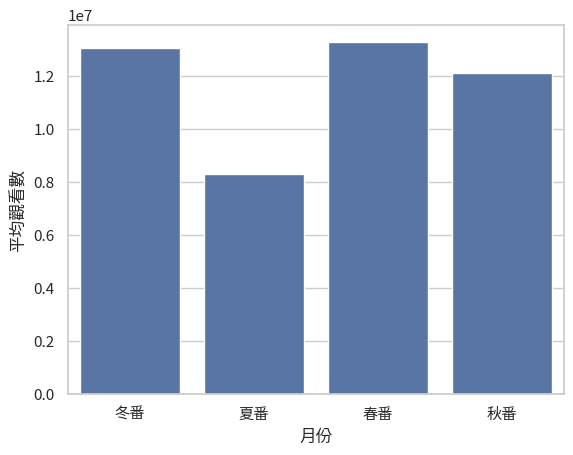

In [75]:
view_number_total = df.groupby('月份', as_index=False).sum()
sns.barplot(data=view_number_total, x='月份', y='平均觀看數')

<Axes: xlabel='年份', ylabel='總觀看數'>

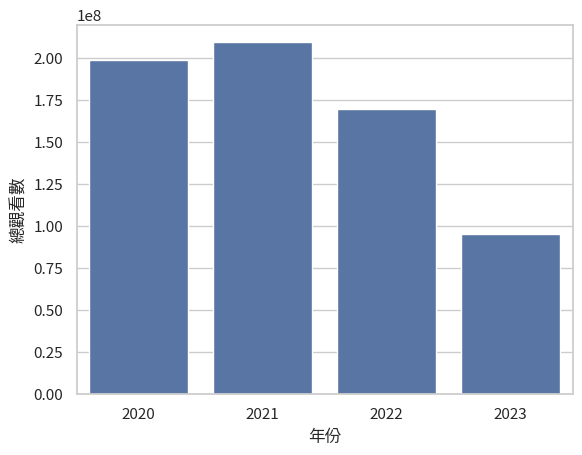

In [76]:
view_number_total = df.groupby('年份', as_index=False).sum()
sns.barplot(data=view_number_total, x='年份', y='總觀看數')

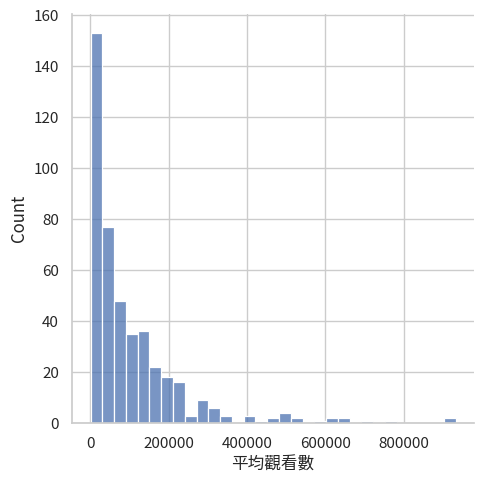

In [77]:
sns.displot(data=df, x='平均觀看數')

In [92]:
df1 = df.loc[df['平均觀看數'] > 400000].sort_values('平均觀看數', ascending=False)
df1.head(30)

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
355,458,咒術迴戰,22381000,932542,2020,秋番,24,4.9,20200,朴性厚,羚邦,MAPPA,動作,奇幻,超能力,校園,血腥暴力,靈異神怪,漫畫改編,新作
197,244,鬼滅之刃 遊郭篇,10212000,928364,2021,秋番,11,4.9,17959,外崎春雄,木棉花,ufotable,動作,冒險,奇幻,血腥暴力,NaN,NaN,漫畫改編,續作
390,513,輝夜姬想讓人告白～天才們的戀愛頭腦戰～ 第二季,9306000,775500,2020,春番,12,5.0,20191,畠山守,木棉花,A-1 Pictures,校園,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作
152,185,SPY×FAMILY 間諜家家酒,17603000,704120,2022,春番,25,4.9,52703,古橋一浩,木棉花,WIT STUDIO×CloverWorks,動作,喜劇,親情,NaN,NaN,NaN,漫畫改編,續作
3,4,【我推的孩子】,7065000,642273,2023,春番,11,4.9,52618,平牧大輔,羚邦,動畫工房 (DOGAKOBO),親情,偶像,懸疑,NaN,NaN,NaN,漫畫改編,新作
185,227,戀上換裝娃娃,7591000,632583,2022,冬番,12,5.0,41233,篠原啓輔,木棉花,CloverWorks,校園,戀愛,青春,NaN,NaN,NaN,漫畫改編,新作
90,100,孤獨搖滾！,7579000,631583,2022,秋番,12,5.0,44820,齋藤圭一郎,曼迪,CloverWorks,校園,喜劇,青春,勵志,音樂,NaN,漫畫改編,新作
321,409,關於我轉生變成史萊姆這檔事 第二季,16078000,618385,2021,冬番,26,4.8,14097,中山敦史,木棉花,8bit,冒險,奇幻,異世界,魔法,喜劇,NaN,小說改編,續作
328,421,進擊的巨人 The Final Season,17210000,593448,2020,秋番,29,4.9,24841,林祐一郎,木棉花,MAPPA,動作,冒險,戰爭,血腥暴力,NaN,NaN,原創作品,新作
303,391,無職轉生，到了異世界就拿出真本事,12968000,540333,2021,冬番,24,4.9,25806,岡本学,木棉花,StudioBind,動作,冒險,奇幻,異世界,魔法,NaN,小說改編,續作


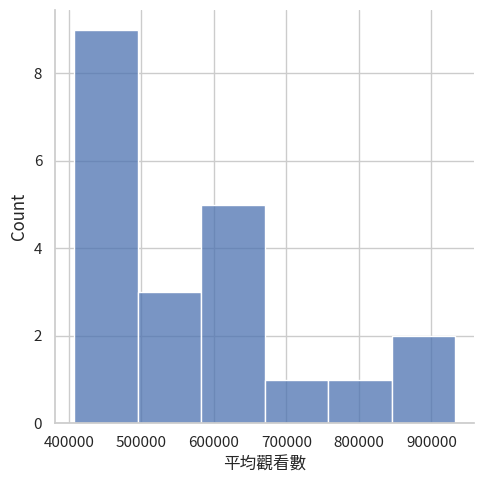

In [93]:
sns.displot(data=df1, x='平均觀看數')

In [102]:
df2 = df.loc[(df.平均觀看數 <= 400000) & (df.平均觀看數 > 100000)]
df2

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
4,5,屍體如山的死亡遊戲,2678000,133900,2023,春番,20,4.8,10096,小野學,羚邦,GEEK TOYS,動作,冒險,異世界,血腥暴力,NaN,NaN,漫畫改編,續作
11,12,機動戰士鋼彈 水星的魔女 Season 2,1451000,120917,2023,春番,12,4.9,8597,⼩林寬,羚邦,SUNRISE,科幻,機甲,校園,戰爭,NaN,NaN,原創作品,續作
12,13,肌肉魔法使-MASHLE-,3603000,277154,2023,春番,13,4.8,13340,田中智也,羚邦,A-1 Pictures,奇幻,魔法,校園,喜劇,NaN,NaN,漫畫改編,新作
16,17,勇者死了！,1320000,110000,2023,春番,12,4.7,5679,久城凜音,木棉花,LIDENFILMS,冒險,奇幻,喜劇,NaN,NaN,NaN,漫畫改編,新作
20,21,為美好的世界獻上爆焰！,2483000,206917,2023,春番,12,4.9,18462,安部祐二郎,羚邦,Drive,奇幻,魔法,校園,喜劇,NaN,NaN,小說改編,續作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,563,排球少年！！第四季,4012000,308615,2020,冬番,13,4.9,5101,佐藤雅子,羚邦,Production I.G,校園,勵志,運動,NaN,NaN,NaN,漫畫改編,續作
429,564,〈Infinite Dendrogram〉-無盡連鎖-,1496000,115077,2020,冬番,13,4.0,1463,小林智樹,羚邦,NAZ,動作,冒險,奇幻,NaN,NaN,NaN,改編作品,新作
434,569,地縛少年花子君,1751000,145917,2020,冬番,12,4.9,2917,安藤正臣,木棉花,Lerche,校園,靈異神怪,NaN,NaN,NaN,NaN,漫畫改編,新作
444,580,達爾文遊戲,3708000,285231,2020,冬番,13,4.8,5745,德本善信,木棉花,Nexus,動作,超能力,競技,懸疑,血腥暴力,NaN,漫畫改編,新作


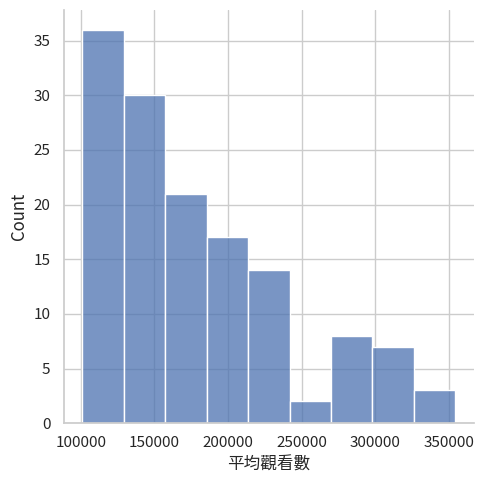

In [103]:
sns.displot(data=df2, x='平均觀看數')

In [104]:
df3 = df.loc[df['平均觀看數'] <= 100000].sort_values('平均觀看數', ascending=False)
df3

,id,動畫名,總觀看數,平均觀看數,年份,月份,集數,星級,評分人數,導演監督,台灣代理,製作廠商,作品分類1,作品分類2,作品分類3,作品分類4,作品分類5,作品分類6,原作載體,新續作
71,74,小智是女孩啦！,1293000,99462,2023,冬番,13,4.9,7482,難波日登志,曼迪,Lay-duce,校園,戀愛,NaN,NaN,NaN,NaN,漫畫改編,新作
127,146,異世界迷宮裡的後宮生活,1179000,98250,2022,夏番,12,4.2,4595,龍輪直征,羚邦,パッショーネ,冒險,奇幻,異世界,NaN,NaN,NaN,小說改編,新作
363,468,大貴族,1360000,97143,2020,秋番,14,4.7,1356,多田俊介、山本靖貴,木棉花,Production I.G,冒險,奇幻,校園,NaN,NaN,NaN,漫畫改編,新作
251,318,死神少爺與黑女僕,1165000,97083,2021,夏番,12,4.9,4556,山川吉樹,羚邦,J.C.STAFF,奇幻,喜劇,戀愛,NaN,NaN,NaN,漫畫改編,續作
68,69,冰劍的魔術師將要統一世界,1157000,96417,2023,冬番,12,3.3,5841,高田昌弘,羚邦,CLOUD HEARTS,冒險,奇幻,NaN,NaN,NaN,NaN,小說改編,新作
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,境界服務,13000,1083,2023,春番,12,3.8,84,迫井政行,ANIPLUS,Studio 3Hz,動作,科幻,喜劇,職場,NaN,NaN,原創作品,新作
169,207,新 忍者哈特利 第六季,28000,1077,2022,冬番,26,4.0,28,やすみ哲夫,木棉花,Shambhoo S.Phaike,喜劇,悠閒,親情,闔家觀賞,NaN,NaN,漫畫改編,續作
236,302,暗夜第六感 2041,11000,917,2021,夏番,12,4.1,94,平川孝充,Aniplus,白組,超能力,科幻,NaN,NaN,NaN,NaN,原創作品,新作
18,19,魔法少女毀滅者,10000,833,2023,春番,12,3.1,125,博史池畠,ANIPLUS,Bibury Animation Studios,冒險,奇幻,喜劇,NaN,NaN,NaN,原創作品,新作


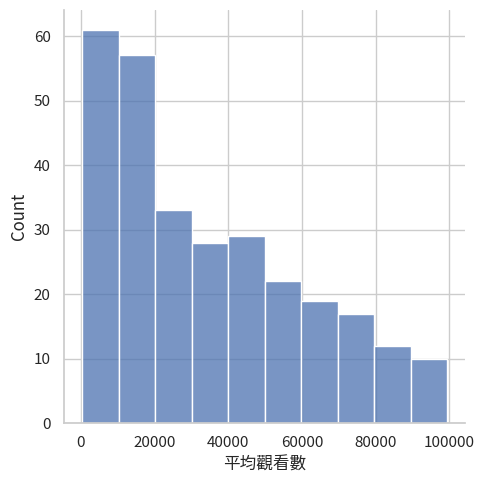

In [97]:
sns.displot(data=df3, x='平均觀看數')